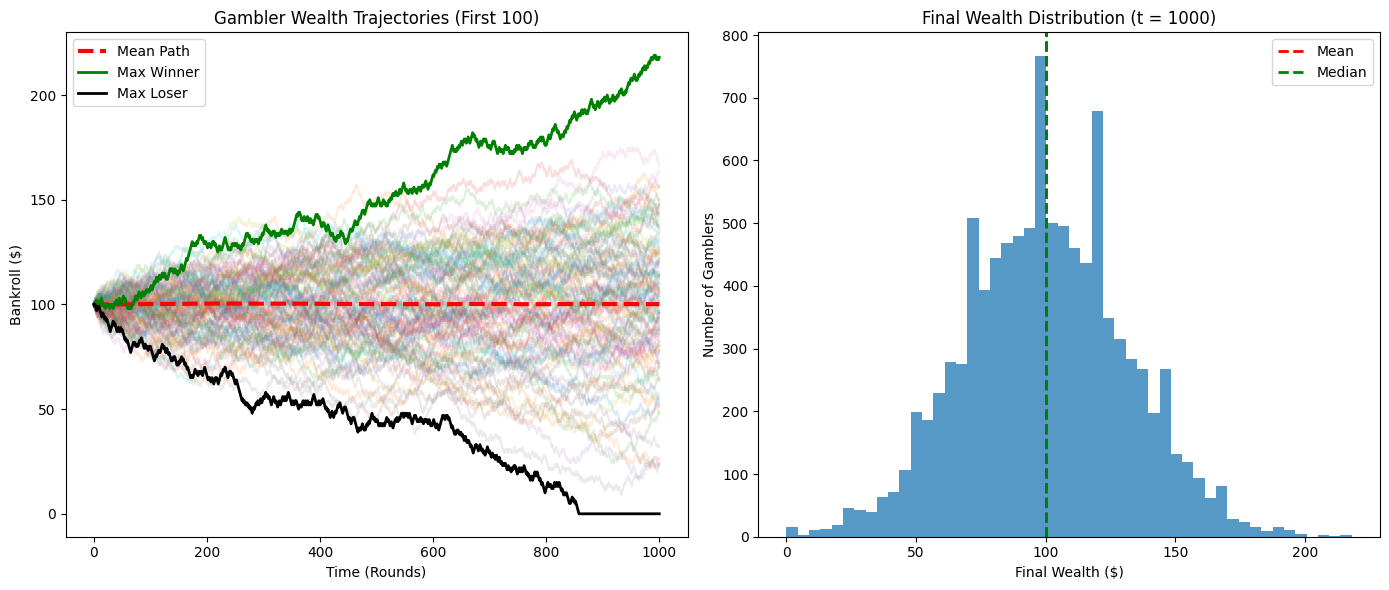

Mean Final Wealth   : 100.09
Median Final Wealth : 100.00
Bankrupt Gamblers   : 13 / 10000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

N: int = 10_000   # Number of gamblers
T: int = 1_000    # Number of rounds
START_BANKROLL: int = 100

np.random.seed(42)  

outcomes: np.ndarray = np.random.choice(
    [-1, 1],
    size=(N, T)
)

wealth_changes: np.ndarray = np.cumsum(outcomes, axis=1)


wealth: np.ndarray = wealth_changes + START_BANKROLL #contains bankroll after each bet

wealth = np.hstack([
    np.full((N, 1), START_BANKROLL), #stack amout at time 0
    wealth
])


ruined: np.ndarray = wealth <= 0

ruined_cumulative: np.ndarray = np.maximum.accumulate(ruined, axis=1)

wealth[ruined_cumulative] = 0

plt.figure(figsize=(14, 6))

#Subplot 1: Trajectories
plt.subplot(1, 2, 1)

time = np.arange(wealth.shape[1])

# First 100 gamblers
plt.plot(time, wealth[:100].T, alpha=0.15)

# Mean path
mean_path = wealth.mean(axis=0)
plt.plot(time, mean_path, 'r--', linewidth=3, label='Mean Path')

# Max winner & loser
final_wealth = wealth[:, -1]
max_winner = wealth[np.argmax(final_wealth)]
max_loser = wealth[np.argmin(final_wealth)]

plt.plot(time, max_winner, color='green', linewidth=2, label='Max Winner')
plt.plot(time, max_loser, color='black', linewidth=2, label='Max Loser')

plt.title("Gambler Wealth Trajectories (First 100)")
plt.xlabel("Time (Rounds)")
plt.ylabel("Bankroll ($)")
plt.legend()

# Subplot 2: Histogram 
plt.subplot(1, 2, 2)

plt.hist(final_wealth, bins=50, alpha=0.75)

mean_final = final_wealth.mean()
median_final = np.median(final_wealth)

plt.axvline(mean_final, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(median_final, color='green', linestyle='--', linewidth=2, label='Median')

plt.title("Final Wealth Distribution (t = 1000)")
plt.xlabel("Final Wealth ($)")
plt.ylabel("Number of Gamblers")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Mean Final Wealth   : {mean_final:.2f}")
print(f"Median Final Wealth : {median_final:.2f}")
print(f"Bankrupt Gamblers   : {(final_wealth == 0).sum()} / {N}")
